# Final Project - SI Celerates (Credit Score Analysis)
### Akhmad Miftakhul Ilmi - takhulilmi99@gmail.com

## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load Data
application_m = pd.read_excel('/content/drive/My Drive/FP SI Celerates/Dataset/application_history_m.xlsx')
application_f = pd.read_excel('/content/drive/My Drive/FP SI Celerates/Dataset/application_history_f.xlsx')

In [4]:
application_m.head

<bound method NDFrame.head of         Id_customer         JK KepemilikanMobil KepemilikanProperti  JmlAnak  \
0           5008804  Laki-laki               Ya                  Ya        0   
1           5008805  Laki-laki               Ya                  Ya        0   
2           5008806  Laki-laki               Ya                  Ya        0   
3           5008815  Laki-laki               Ya                  Ya        0   
4           5112956  Laki-laki               Ya                  Ya        0   
...             ...        ...              ...                 ...      ...   
144091      5009372  Laki-laki               Ya               Tidak        0   
144092      5009373  Laki-laki               Ya               Tidak        0   
144093      6153586  Laki-laki               Ya               Tidak        0   
144094      6153587  Laki-laki               Ya               Tidak        0   
144095      5009426  Laki-laki            Tidak               Tidak        0   

        P

In [5]:
application_f.head

<bound method NDFrame.head of         Id_customer         JK KepemilikanMobil KepemilikanProperti  JmlAnak  \
0           5008808  Perempuan            Tidak                  Ya        0   
1           5008809  Perempuan            Tidak                  Ya        0   
2           5008810  Perempuan            Tidak                  Ya        0   
3           5008811  Perempuan            Tidak                  Ya        0   
4           5008812  Perempuan            Tidak                  Ya        0   
...             ...        ...              ...                 ...      ...   
294355      5009315  Perempuan               Ya               Tidak        0   
294356      5009316  Perempuan               Ya               Tidak        0   
294357      5009317  Perempuan               Ya               Tidak        0   
294358      5009318  Perempuan               Ya               Tidak        0   
294359      5009319  Perempuan               Ya               Tidak        0   

        P

In [6]:
application_m.shape

(144096, 18)

In [7]:
application_f.shape

(294360, 18)

In [8]:
application_all = pd.merge(application_m, application_f, how="outer")
application_all.shape

(438456, 18)

In [9]:
application_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438456 entries, 0 to 438455
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_customer          438456 non-null  int64  
 1   JK                   438456 non-null  object 
 2   KepemilikanMobil     438456 non-null  object 
 3   KepemilikanProperti  438456 non-null  object 
 4   JmlAnak              438456 non-null  int64  
 5   Pendapatan           438456 non-null  float64
 6   TipePendapatan       438456 non-null  object 
 7   TingkatPendidikan    438456 non-null  object 
 8   StatusKeluarga       438456 non-null  object 
 9   TipeRumah            438456 non-null  object 
 10  FlagMobile           438456 non-null  int64  
 11  FlagWorkPhone        438456 non-null  int64  
 12  FlagPhone            438456 non-null  int64  
 13  Email                438456 non-null  int64  
 14  Pekerjaan            304213 non-null  object 
 15  JmlAnggotaKeluarg

Null-value appear with a large portion (>100k) on variable "Pekerjaan". So variable "Pekerjaan" will be drop

In [10]:
application_all1 = application_all.drop('Pekerjaan', axis = 1)

In [11]:
application_all1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438456 entries, 0 to 438455
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_customer          438456 non-null  int64  
 1   JK                   438456 non-null  object 
 2   KepemilikanMobil     438456 non-null  object 
 3   KepemilikanProperti  438456 non-null  object 
 4   JmlAnak              438456 non-null  int64  
 5   Pendapatan           438456 non-null  float64
 6   TipePendapatan       438456 non-null  object 
 7   TingkatPendidikan    438456 non-null  object 
 8   StatusKeluarga       438456 non-null  object 
 9   TipeRumah            438456 non-null  object 
 10  FlagMobile           438456 non-null  int64  
 11  FlagWorkPhone        438456 non-null  int64  
 12  FlagPhone            438456 non-null  int64  
 13  Email                438456 non-null  int64  
 14  JmlAnggotaKeluarga   438456 non-null  int64  
 15  Age              

In [12]:
application_all1.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Age,Experience
0,5008804,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,2,33,12
1,5008805,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,2,33,12
2,5008805,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,2,33,12
3,5008806,Laki-laki,Ya,Ya,0,112500.0,Bekerja,G,M,MH,1,0,0,0,2,59,3
4,5008815,Laki-laki,Ya,Ya,0,270000.0,Bekerja,PG,M,MH,1,1,1,1,2,46,2


In [13]:
#How Many Unique on Customer ID
dupp_app = application_all1.pivot_table(columns=['Id_customer'], aggfunc='size')
print(dupp_app)

Id_customer
5008804    1
5008805    2
5008806    1
5008808    1
5008809    1
          ..
7999660    1
7999696    1
7999738    1
7999784    1
7999952    1
Length: 438310, dtype: int64


In [14]:
#Unique Value in Each Variable
pd.Series({col:application_all1[col].nunique() for col in application_all1})

Id_customer            438310
JK                          2
KepemilikanMobil            2
KepemilikanProperti         2
JmlAnak                    12
Pendapatan                866
TipePendapatan              5
TingkatPendidikan           3
StatusKeluarga              3
TipeRumah                   5
FlagMobile                  1
FlagWorkPhone               2
FlagPhone                   2
Email                       2
JmlAnggotaKeluarga         13
Age                        49
Experience                 49
dtype: int64

In [15]:
#Drop duplicates on Id_customer
application_all_2 = application_all1.drop_duplicates(subset='Id_customer')

In [16]:
application_all_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438310 entries, 0 to 438455
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id_customer          438310 non-null  int64  
 1   JK                   438310 non-null  object 
 2   KepemilikanMobil     438310 non-null  object 
 3   KepemilikanProperti  438310 non-null  object 
 4   JmlAnak              438310 non-null  int64  
 5   Pendapatan           438310 non-null  float64
 6   TipePendapatan       438310 non-null  object 
 7   TingkatPendidikan    438310 non-null  object 
 8   StatusKeluarga       438310 non-null  object 
 9   TipeRumah            438310 non-null  object 
 10  FlagMobile           438310 non-null  int64  
 11  FlagWorkPhone        438310 non-null  int64  
 12  FlagPhone            438310 non-null  int64  
 13  Email                438310 non-null  int64  
 14  JmlAnggotaKeluarga   438310 non-null  int64  
 15  Age              

### Load Credit History Data (Last Row)

In [17]:
credit_history = pd.read_csv('/content/drive/My Drive/FP SI Celerates/Dataset/credit_history.csv')

In [18]:
credit_history

,Id_customer,Overdue
0,5001711,Tidak memiliki pinjaman
1,5001711,0
2,5001711,0
3,5001711,0
4,5001712,0
...,...,...
1043981,5150487,0
1043982,5150487,0
1043983,5150487,0
1043984,5150487,0


In [19]:
credit_history['Overdue'].value_counts()

0                          821230
Tidak memiliki pinjaman    208755
1                           10936
5                            1677
2                             849
3                             317
4                             222
Name: Overdue, dtype: int64

In [20]:
#Drop ID customer that have the status "Tidak memiliki pinjaman"
credit_history_1 = credit_history[credit_history.Overdue != 'Tidak memiliki pinjaman']
credit_history_1['Overdue'].value_counts()

0    821230
1     10936
5      1677
2       849
3       317
4       222
Name: Overdue, dtype: int64

In [21]:
credit_history_sort = credit_history_1.sort_values(['Id_customer','Overdue'])

In [22]:
credit_history_sort

,Id_customer,Overdue
1,5001711,0
2,5001711,0
3,5001711,0
4,5001712,0
5,5001712,0
...,...,...
1043981,5150487,0
1043982,5150487,0
1043983,5150487,0
1043984,5150487,0


In [23]:
from pandas.core.algorithms import rank
credit_history_2 = credit_history_sort.drop_duplicates(subset='Id_customer',keep='last')

In [24]:
credit_history_2['Overdue'].value_counts()

0    35976
1     4617
2      328
5      193
3       87
4       48
Name: Overdue, dtype: int64

In [25]:
credit_history_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41249 entries, 3 to 1043985
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id_customer  41249 non-null  int64 
 1   Overdue      41249 non-null  object
dtypes: int64(1), object(1)
memory usage: 966.8+ KB


In [26]:
credit_history_2

,Id_customer,Overdue
3,5001711,0
22,5001712,0
141,5001717,0
154,5001718,1
223,5001719,0
...,...,...
1043861,5150480,0
1043922,5150482,0
1043953,5150484,0
1043955,5150485,0


### Join Application Table and Credit History Table

In [27]:
application_history = application_all_2.merge(credit_history_2, on='Id_customer', validate = 'one_to_one')
application_history.head()

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Age,Experience,Overdue
0,5008804,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,2,33,12,1
1,5008805,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,2,33,12,1
2,5008806,Laki-laki,Ya,Ya,0,112500.0,Bekerja,G,M,MH,1,0,0,0,2,59,3,0
3,5008815,Laki-laki,Ya,Ya,0,270000.0,Bekerja,PG,M,MH,1,1,1,1,2,46,2,0
4,5112956,Laki-laki,Ya,Ya,0,270000.0,Bekerja,PG,M,MH,1,1,1,1,2,46,2,0


In [28]:
application_history.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32910 entries, 0 to 32909
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_customer          32910 non-null  int64  
 1   JK                   32910 non-null  object 
 2   KepemilikanMobil     32910 non-null  object 
 3   KepemilikanProperti  32910 non-null  object 
 4   JmlAnak              32910 non-null  int64  
 5   Pendapatan           32910 non-null  float64
 6   TipePendapatan       32910 non-null  object 
 7   TingkatPendidikan    32910 non-null  object 
 8   StatusKeluarga       32910 non-null  object 
 9   TipeRumah            32910 non-null  object 
 10  FlagMobile           32910 non-null  int64  
 11  FlagWorkPhone        32910 non-null  int64  
 12  FlagPhone            32910 non-null  int64  
 13  Email                32910 non-null  int64  
 14  JmlAnggotaKeluarga   32910 non-null  int64  
 15  Age                  32910 non-null 

In [29]:
application_history['Overdue'].value_counts()

0    28696
1     3609
2      306
5      178
3       75
4       46
Name: Overdue, dtype: int64

In [30]:
application_history_2 = application_history.drop('Id_customer', axis = 1)

In [31]:
#Check for duplicate
application_history_2.duplicated(keep='first').sum()

22087

In [32]:
application_history_3 = application_history_2.drop_duplicates(keep='first')

In [33]:
application_history_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10823 entries, 0 to 32909
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JK                   10823 non-null  object 
 1   KepemilikanMobil     10823 non-null  object 
 2   KepemilikanProperti  10823 non-null  object 
 3   JmlAnak              10823 non-null  int64  
 4   Pendapatan           10823 non-null  float64
 5   TipePendapatan       10823 non-null  object 
 6   TingkatPendidikan    10823 non-null  object 
 7   StatusKeluarga       10823 non-null  object 
 8   TipeRumah            10823 non-null  object 
 9   FlagMobile           10823 non-null  int64  
 10  FlagWorkPhone        10823 non-null  int64  
 11  FlagPhone            10823 non-null  int64  
 12  Email                10823 non-null  int64  
 13  JmlAnggotaKeluarga   10823 non-null  int64  
 14  Age                  10823 non-null  int64  
 15  Experience           10823 non-null 

## Complete The Application History Table

In [65]:
application_history_3['status'] = np.where(application_history_3['Overdue'].str.contains('0'), 0, 1)

<ipython-input-65-770ef70efbc7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_history_3['status'] = np.where(application_history_3['Overdue'].str.contains('0'), 0, 1)


In [66]:
application_history_3['status'].value_counts()

0    8333
1    2490
Name: status, dtype: int64

In [107]:
application_history_3.head()

,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Age,Experience,Overdue,status
0,Laki-laki,Ya,Ya,0,427500.0,Bekerja,PG,M,RA,1,1,0,0,2,33,12,1,1
2,Laki-laki,Ya,Ya,0,112500.0,Bekerja,G,M,MH,1,0,0,0,2,59,3,0,0
3,Laki-laki,Ya,Ya,0,270000.0,Bekerja,PG,M,MH,1,1,1,1,2,46,2,0,0
5,Laki-laki,Ya,Ya,0,135000.0,Asosiasi komersial,G,M,MH,1,0,0,0,2,49,3,0,0
10,Laki-laki,Ya,Ya,3,270000.0,Bekerja,G,M,MH,1,0,0,0,5,35,3,0,0


In [68]:
application_history_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10823 entries, 0 to 32909
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JK                   10823 non-null  object 
 1   KepemilikanMobil     10823 non-null  object 
 2   KepemilikanProperti  10823 non-null  object 
 3   JmlAnak              10823 non-null  int64  
 4   Pendapatan           10823 non-null  float64
 5   TipePendapatan       10823 non-null  object 
 6   TingkatPendidikan    10823 non-null  object 
 7   StatusKeluarga       10823 non-null  object 
 8   TipeRumah            10823 non-null  object 
 9   FlagMobile           10823 non-null  int64  
 10  FlagWorkPhone        10823 non-null  int64  
 11  FlagPhone            10823 non-null  int64  
 12  Email                10823 non-null  int64  
 13  JmlAnggotaKeluarga   10823 non-null  int64  
 14  Age                  10823 non-null  int64  
 15  Experience           10823 non-null 

In [114]:
application_history_3['Pendapatan'] = (application_history_3['Pendapatan']).astype(int)

<ipython-input-114-31966bf68a0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_history_3['Pendapatan'] = (application_history_3['Pendapatan']).astype(int)


In [115]:
application_history_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10823 entries, 0 to 32909
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   JK                   10823 non-null  object
 1   KepemilikanMobil     10823 non-null  object
 2   KepemilikanProperti  10823 non-null  object
 3   JmlAnak              10823 non-null  int64 
 4   Pendapatan           10823 non-null  int64 
 5   TipePendapatan       10823 non-null  object
 6   TingkatPendidikan    10823 non-null  object
 7   StatusKeluarga       10823 non-null  object
 8   TipeRumah            10823 non-null  object
 9   FlagMobile           10823 non-null  int64 
 10  FlagWorkPhone        10823 non-null  int64 
 11  FlagPhone            10823 non-null  int64 
 12  Email                10823 non-null  int64 
 13  JmlAnggotaKeluarga   10823 non-null  int64 
 14  Age                  10823 non-null  int64 
 15  Experience           10823 non-null  int64 
 16  Over

In [116]:
# Correlation
application_history_continous = application_history_3.corr()

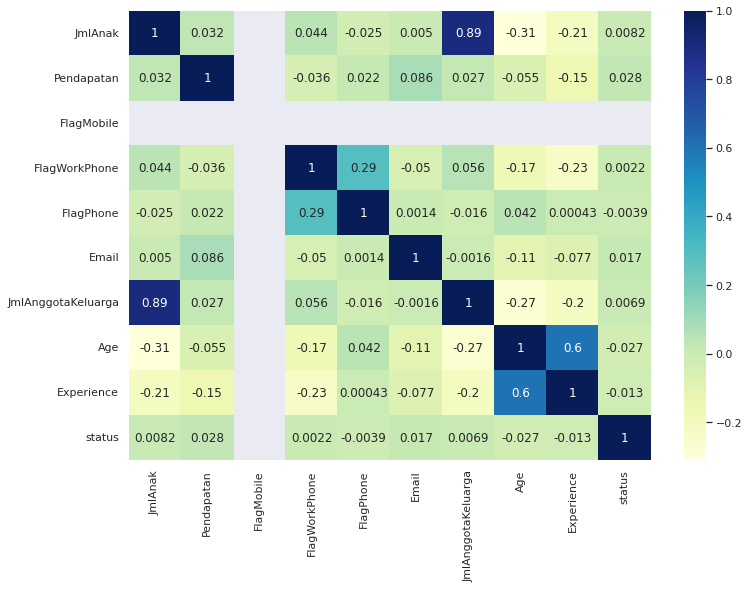

In [117]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
dataplot = sns.heatmap(application_history_3.corr(), cmap="YlGnBu", annot=True)

Based on the correlation above we can avoid multicolinearity by dropping some variables that have correlation>0.5 and Nan correlation ('JmlAnak', 'Age', and 'FlagMobile') , so variables that dropped for the modeling are:
1. Id_customer
2. Pekerjaan
3. JmlAnak
4. Age
5. FlagMobile
6. Overduue

In [396]:
application_history_4 = application_history_3.drop(['JmlAnak', 'Age', 'FlagMobile'], axis = 1)
application_history_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10823 entries, 0 to 32909
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   JK                   10823 non-null  object
 1   KepemilikanMobil     10823 non-null  object
 2   KepemilikanProperti  10823 non-null  object
 3   Pendapatan           10823 non-null  int64 
 4   TipePendapatan       10823 non-null  object
 5   TingkatPendidikan    10823 non-null  object
 6   StatusKeluarga       10823 non-null  object
 7   TipeRumah            10823 non-null  object
 8   FlagWorkPhone        10823 non-null  int64 
 9   FlagPhone            10823 non-null  int64 
 10  Email                10823 non-null  int64 
 11  JmlAnggotaKeluarga   10823 non-null  int64 
 12  Experience           10823 non-null  int64 
 13  Overdue              10823 non-null  object
 14  status               10823 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 1.6+ MB


In [397]:
application_history_4.to_csv(index=False)

'JK,KepemilikanMobil,KepemilikanProperti,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Experience,Overdue,status\nLaki-laki,Ya,Ya,427500,Bekerja,PG,M,RA,1,0,0,2,12,1,1\nLaki-laki,Ya,Ya,112500,Bekerja,G,M,MH,0,0,0,2,3,0,0\nLaki-laki,Ya,Ya,270000,Bekerja,PG,M,MH,1,1,1,2,2,0,0\nLaki-laki,Ya,Ya,135000,Asosiasi komersial,G,M,MH,0,0,0,2,3,0,0\nLaki-laki,Ya,Ya,270000,Bekerja,G,M,MH,0,0,0,5,3,0,0\nLaki-laki,Tidak,Ya,405000,Asosiasi komersial,PG,M,MH,0,0,0,3,6,0,0\nLaki-laki,Ya,Ya,112500,Asosiasi komersial,G,M,MH,0,1,0,2,12,0,0\nLaki-laki,Ya,Ya,360000,Asosiasi komersial,G,M,MH,0,1,0,2,15,1,1\nLaki-laki,Tidak,Ya,225000,Bekerja,G,M,MH,0,0,0,3,8,0,0\nLaki-laki,Tidak,Ya,157500,Bekerja,G,M,MH,0,1,0,2,2,1,1\nLaki-laki,Tidak,Ya,157500,Bekerja,G,M,MH,0,1,0,2,2,0,0\nLaki-laki,Ya,Ya,112500,PNS,G,M,MH,0,1,0,2,7,0,0\nLaki-laki,Ya,Ya,157500,Bekerja,G,M,MH,0,0,0,2,2,0,0\nLaki-laki,Tidak,Ya,166500,Bekerja,G,M,MH,1,1,0,2,17,0,0\nLaki-laki,

#### Outlier Remover

In [384]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [375]:
#outlier remover
class OutlierRemover(BaseEstimator, TransformerMixin):
    def _init_(self, feat_with_outliers = ['JmlAnggotaKeluarga','Pendapatan', 'Experience']):
        self.feat_with_outliers = feat_with_outliers
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.feat_with_outliers).issubset(df.columns)):
            # 25% quantile
            Q1 = df[self.feat_with_outliers].quantile(.25)
            # 75% quantile
            Q3 = df[self.feat_with_outliers].quantile(.75)
            IQR = Q3 - Q1
            # keep the data within 3 IQR
            df = df[~((df[self.feat_with_outliers] < (Q1 - 3 * IQR)) |(df[self.feat_with_outliers] > (Q3 + 3 * IQR))).any(axis=1)]
            return df
        else:
            print("Satu atau beberapa fitur tidak ada dalam dataframe")
            return df

In [385]:
def full_pipeline(df):
    # Create the pipeline that will call all the class from OutlierRemoval to OversampleSMOTE in one go
    pipeline = Pipeline([
        ('outlier_remover', OutlierRemover())
    ])
    df_pipe_prep = pipeline.fit_transform(df)
    return df_pipe_prep

In [386]:
full_pipeline (application_history_4)

AttributeError: ignored

In [381]:
application_history_10 = outlier_remover._init_(application_history_4)
application_history_10 = outlier_remover.fit(application_history_4)
application_history_10 = outlier_remover.transform(application_history_4)

ValueError: ignored

In [364]:
application_history_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10823 entries, 0 to 32909
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   JK                   10823 non-null  object
 1   KepemilikanMobil     10823 non-null  object
 2   KepemilikanProperti  10823 non-null  object
 3   Pendapatan           10823 non-null  int64 
 4   TipePendapatan       10823 non-null  object
 5   TingkatPendidikan    10823 non-null  object
 6   StatusKeluarga       10823 non-null  object
 7   TipeRumah            10823 non-null  object
 8   FlagWorkPhone        10823 non-null  int64 
 9   FlagPhone            10823 non-null  int64 
 10  Email                10823 non-null  int64 
 11  JmlAnggotaKeluarga   10823 non-null  int64 
 12  Experience           10823 non-null  int64 
 13  status               10823 non-null  int64 
dtypes: int64(7), object(7)
memory usage: 1.5+ MB


###### One Hot Encode

In [307]:
#Decoding JK
application_history_5=pd.get_dummies(data=application_history_5,columns=['JK'])
#Decoding Kepemilikan Properti
application_history_5=pd.get_dummies(data=application_history_5,columns=['KepemilikanProperti'])
#Decoding Kepemilikan Mobil
application_history_5=pd.get_dummies(data=application_history_5,columns=['KepemilikanMobil'])
#Decoding Tipe Pendapatan
application_history_5=pd.get_dummies(data=application_history_5,columns=['TipePendapatan'])
#Decoding Tipe Pendidikan
application_history_5=pd.get_dummies(data=application_history_5,columns=['TingkatPendidikan'])
#Decoding Status keluarga
application_history_5=pd.get_dummies(data=application_history_5,columns=['StatusKeluarga'])
#Decoding Tipe Rumah
application_history_5=pd.get_dummies(data=application_history_5,columns=['TipeRumah'])

In [308]:
application_history_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10449 entries, 2 to 32909
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pendapatan             10449 non-null  float64
 1   FlagWorkPhone          10449 non-null  int64  
 2   FlagPhone              10449 non-null  int64  
 3   Email                  10449 non-null  int64  
 4   JmlAnggotaKeluarga     10449 non-null  float64
 5   Experience             10449 non-null  float64
 6   status                 10449 non-null  int64  
 7   JK_0                   10449 non-null  uint8  
 8   JK_1                   10449 non-null  uint8  
 9   KepemilikanProperti_0  10449 non-null  uint8  
 10  KepemilikanProperti_1  10449 non-null  uint8  
 11  KepemilikanMobil_0     10449 non-null  uint8  
 12  KepemilikanMobil_1     10449 non-null  uint8  
 13  TipePendapatan_0       10449 non-null  uint8  
 14  TipePendapatan_1       10449 non-null  uint8  
 15  Ti

##### Label Encoder

In [379]:
from sklearn.preprocessing import LabelEncoder

for col in ["JK","KepemilikanProperti", "KepemilikanMobil", "TipePendapatan", "TingkatPendidikan", "TipeRumah", "StatusKeluarga"]:
    application_history_4[col] = LabelEncoder().fit_transform(application_history_4[col])

In [380]:
application_history_4.head()

,JK,KepemilikanMobil,KepemilikanProperti,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Experience,status
0,0,1,1,427500,1,1,1,4,1,0,0,2,12,1
2,0,1,1,112500,1,0,1,1,0,0,0,2,3,0
3,0,1,1,270000,1,1,1,1,1,1,1,2,2,0
5,0,1,1,135000,0,0,1,1,0,0,0,2,3,0
10,0,1,1,270000,1,0,1,1,0,0,0,5,3,0


#### Outlier Remover Manual

##### Pendapatan

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


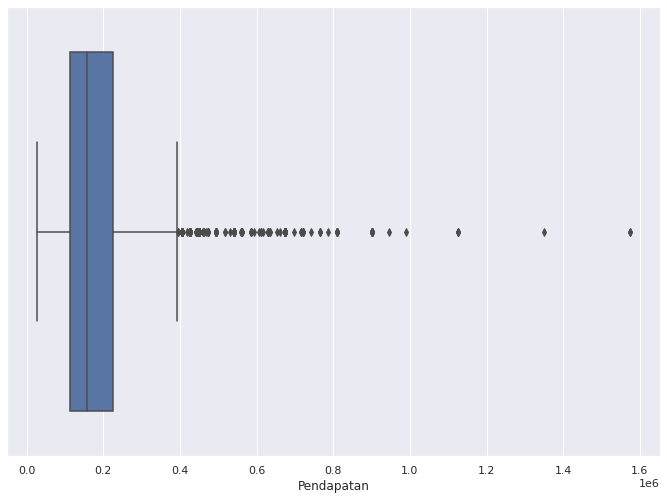

In [159]:
# Box Plot Pendapatan
sns.boxplot(application_history_4['Pendapatan'])

In [129]:
#Outlier
#Using Inter Quartil Range
# IQR Pendapatan
percentile25 = application_history_4['Pendapatan'].quantile(0.25)
percentile75 = application_history_4['Pendapatan'].quantile(0.75)
iqr = percentile75 - percentile25

In [130]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [131]:
application_history_4[application_history_4['Pendapatan'] > upper_limit]
application_history_4[application_history_4['Pendapatan'] < lower_limit]

,JK,KepemilikanMobil,KepemilikanProperti,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Experience,status


In [391]:
application_history_5 = application_history_4[application_history_4['Pendapatan'] < upper_limit]
application_history_5.shape

(10449, 14)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


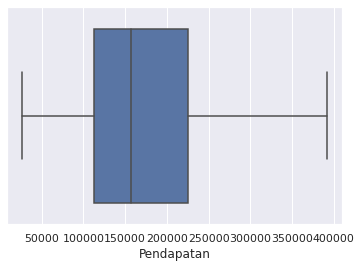

In [392]:
# Box Plot Pendapatan after outlier cleaning
sns.boxplot(application_history_5['Pendapatan'])

##### JmlAnggotaKeluarga

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


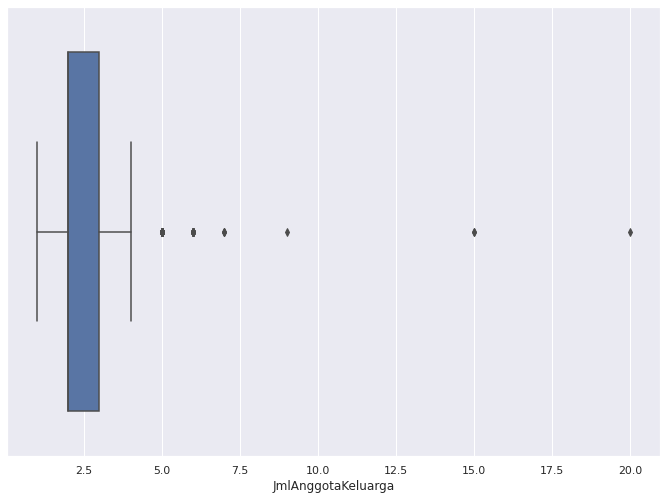

In [166]:
# Box Plot JmlAnggotaKeluarga
sns.boxplot(application_history_5['JmlAnggotaKeluarga'])

In [150]:
#IQR JmlAnggotaKeluarga
percentile25_JAK = application_history_5['JmlAnggotaKeluarga'].quantile(0.25)
percentile75_JAK = application_history_5['JmlAnggotaKeluarga'].quantile(0.75)
iqr_JAK = percentile75_JAK - percentile25_JAK

In [151]:
upper_limit_JAK = percentile75_JAK + 1.5 * iqr_JAK
lower_limit_JAK = percentile25_JAK - 1.5 * iqr_JAK

In [152]:
application_history_5[application_history_5['JmlAnggotaKeluarga'] > upper_limit_JAK]
application_history_5[application_history_5['JmlAnggotaKeluarga'] < lower_limit_JAK]

,JK,KepemilikanMobil,KepemilikanProperti,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Experience,status


In [153]:
application_history_6 = application_history_5[application_history_5['JmlAnggotaKeluarga'] < upper_limit_JAK]
application_history_6.shape

(10296, 14)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


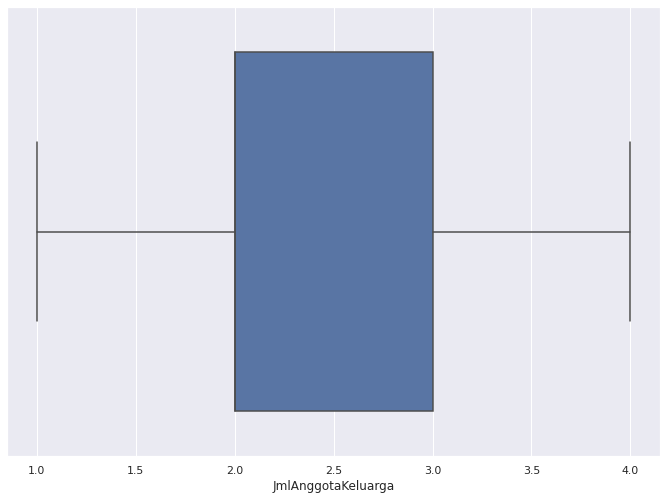

In [162]:
# Box Plot Pendapatan after Outlier Cleaning
sns.boxplot(application_history_6['JmlAnggotaKeluarga'])

##### Experience

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


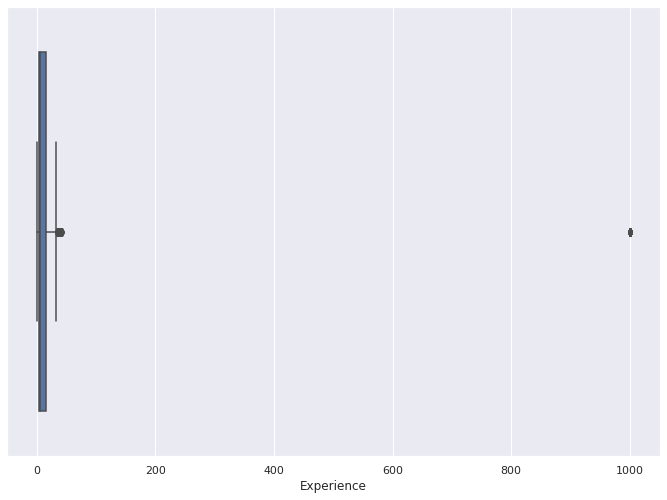

In [167]:
# Box Plot Experience
sns.boxplot(application_history_6['Experience'])

In [163]:
#IQR Experience
percentile25_Ex = application_history_6['Experience'].quantile(0.25)
percentile75_Ex = application_history_6['Experience'].quantile(0.75)
iqr_Ex = percentile75_Ex - percentile25_Ex

In [155]:
upper_limit_Ex = percentile75_Ex + 1.5 * iqr_Ex
lower_limit_Ex = percentile25_Ex - 1.5 * iqr_Ex

In [156]:
application_history_6[application_history_6['Experience'] > upper_limit_Ex]
application_history_6[application_history_6['Experience'] < lower_limit_Ex]

,JK,KepemilikanMobil,KepemilikanProperti,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Experience,status


In [157]:
application_history_7 = application_history_6[application_history_6['Experience'] < upper_limit_Ex]
application_history_7.shape

(8552, 14)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


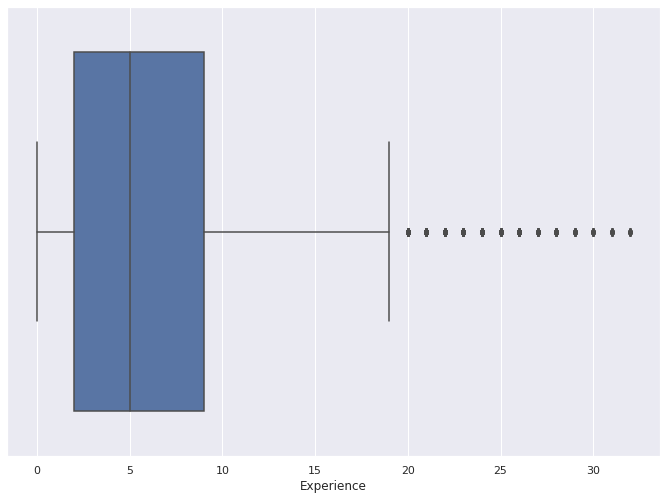

In [165]:
# Box Plot Pendapatan after Outlier Cleaning
sns.boxplot(application_history_7['Experience'])

In [158]:
application_history_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8552 entries, 2 to 32909
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   JK                   8552 non-null   object
 1   KepemilikanMobil     8552 non-null   object
 2   KepemilikanProperti  8552 non-null   object
 3   Pendapatan           8552 non-null   int64 
 4   TipePendapatan       8552 non-null   object
 5   TingkatPendidikan    8552 non-null   object
 6   StatusKeluarga       8552 non-null   object
 7   TipeRumah            8552 non-null   object
 8   FlagWorkPhone        8552 non-null   int64 
 9   FlagPhone            8552 non-null   int64 
 10  Email                8552 non-null   int64 
 11  JmlAnggotaKeluarga   8552 non-null   int64 
 12  Experience           8552 non-null   int64 
 13  status               8552 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 1002.2+ KB


### Scaling Continous Variable

In [300]:
from sklearn.preprocessing import MinMaxScaler

In [352]:
col=['Pendapatan','JmlAnggotaKeluarga','Experience']
scaler=MinMaxScaler()

application_history_5[col]=scaler.fit_transform(application_history_5[col])
application_history_5.head()

,Pendapatan,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Experience,status,JK_0,JK_1,KepemilikanProperti_0,...,TingkatPendidikan_1,TingkatPendidikan_2,StatusKeluarga_0,StatusKeluarga_1,StatusKeluarga_2,TipeRumah_0,TipeRumah_1,TipeRumah_2,TipeRumah_3,TipeRumah_4
2,0.234568,0,0,0,0.052632,0.002997,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.666667,1,1,1,0.052632,0.001998,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
5,0.296296,0,0,0,0.052632,0.002997,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
10,0.666667,0,0,0,0.210526,0.002997,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
18,0.234568,0,1,0,0.052632,0.011988,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0


## Handling Imbalance Data

### Smote

In [353]:
x = application_history_4.drop(['status', 'Overdue'], axis=1)
y = application_history_4['status']

print(x.shape)
print(y.shape)
print(y.value_counts())

(10449, 28)
(10449,)
0    8062
1    2387
Name: status, dtype: int64


In [359]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_selector = SelectKBest(chi2, k=) 
chi2_selector.fit(x, y)

cols = chi2_selector.get_support(indices=True)
x_f = x.iloc[:,cols]

In [360]:
x_f.head()

,Email,Experience,KepemilikanProperti_0,KepemilikanProperti_1,StatusKeluarga_2,TipeRumah_4
2,0,0.002997,0,1,0,0
3,1,0.001998,0,1,0,0
5,0,0.002997,0,1,0,0
10,0,0.002997,0,1,0,0
18,0,0.011988,0,1,0,0


In [356]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')

x_sm, y_sm = smote.fit_resample(x_f,y)

print(y_sm.value_counts())

0    8062
1    8062
Name: status, dtype: int64


### Model

In [312]:
from sklearn.metrics import f1_score
%matplotlib inline

In [313]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=10):
  _scoring = ['accuracy', 'precision', 'recall', 'f1']
  results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
  return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [314]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
  plt.figure(figsize=(16,8))
  labels = ["1st", "2nd", "3rd", "4th", "5th", "6th", "7th", "8th", "9th", "10th"]
  X_axis = np.arange(len(labels))
  ax = plt.gca()
  plt.ylim(0.40000, 1)
  plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
  plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
  plt.title(plot_title, fontsize=30)
  plt.xticks(X_axis, labels)
  plt.xlabel(x_label, fontsize=14)
  plt.ylabel(y_label, fontsize=14)
  plt.legend()
  plt.grid(True)
  plt.show()

#### Decision Tree

In [358]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                     random_state=0)
decision_tree_result = cross_validation(decision_tree_model, x_sm, y_sm, 10)
print(decision_tree_result)

{'Training Accuracy scores': array([0.63076287, 0.64282269, 0.63813659, 0.62711047, 0.62382856,
       0.62555127, 0.6234151 , 0.62437982, 0.62644708, 0.6274118 ]), 'Mean Training Accuracy': 62.8986623708722, 'Training Precision scores': array([0.65301516, 0.66258824, 0.65991063, 0.64501416, 0.61168428,
       0.62310811, 0.64064709, 0.64174651, 0.62826786, 0.62451178]), 'Mean Training Precision': 0.6390493796045889, 'Training Recall scores': array([0.55815877, 0.58213892, 0.56995176, 0.56526533, 0.67819735,
       0.63547409, 0.56215546, 0.56312018, 0.6193495 , 0.63905733]), 'Mean Training Recall': 0.5972868690337879, 'Training F1 scores': array([0.60187249, 0.61976377, 0.61164115, 0.6025123 , 0.64322593,
       0.62923035, 0.5988402 , 0.59986787, 0.62377681, 0.63170084]), 'Mean Training F1 Score': 0.6162431714676477, 'Validation Accuracy scores': array([0.5616863 , 0.44451333, 0.49287043, 0.57842529, 0.56389578,
       0.56079404, 0.61352357, 0.58684864, 0.5825062 , 0.56885856]), 'Me

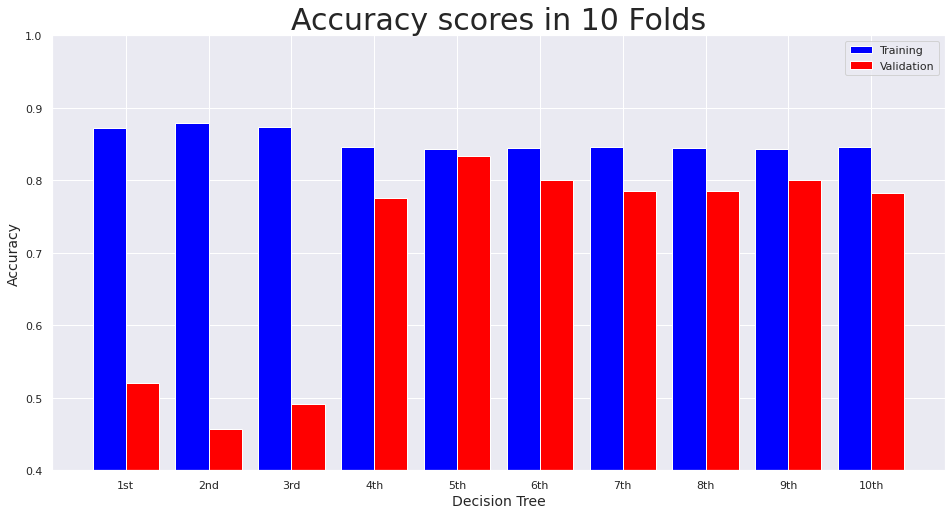

In [339]:
model = "Decision Tree"
plot_result(model,
            "Accuracy",
            "Accuracy scores in 10 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

#### Naive Bayes

In [317]:
from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()
nbc_result = cross_validation(nbc, x_sm, y_sm, 20)
print(nbc_result)

{'Training Accuracy scores': array([0.51047855, 0.53169681, 0.53313312, 0.53228439, 0.53433869,
       0.53518736, 0.52709231, 0.52872438, 0.53022588, 0.5297689 ,
       0.53022588, 0.52865909, 0.52885494, 0.52670061, 0.52683118,
       0.53159681, 0.52911607, 0.52833268, 0.52944249, 0.53022588]), 'Mean Training Accuracy': 52.91458009951386, 'Training Precision scores': array([0.50543002, 0.5181723 , 0.51952553, 0.51899708, 0.5199575 ,
       0.52055839, 0.51572565, 0.51643999, 0.51743879, 0.51706587,
       0.51754452, 0.5172468 , 0.51653202, 0.51506224, 0.51517613,
       0.51852419, 0.51664428, 0.51623765, 0.51693579, 0.51712151]), 'Mean Training Precision': 0.5168168132955374, 'Training Recall scores': array([0.97832615, 0.9046873 , 0.88077827, 0.88117002, 0.89463376,
       0.89097793, 0.88849719, 0.90233712, 0.89685338, 0.90194542,
       0.89163076, 0.85951169, 0.90155373, 0.91304348, 0.91082387,
       0.88444967, 0.90377334, 0.90077034, 0.89868129, 0.91291291]), 'Mean Training

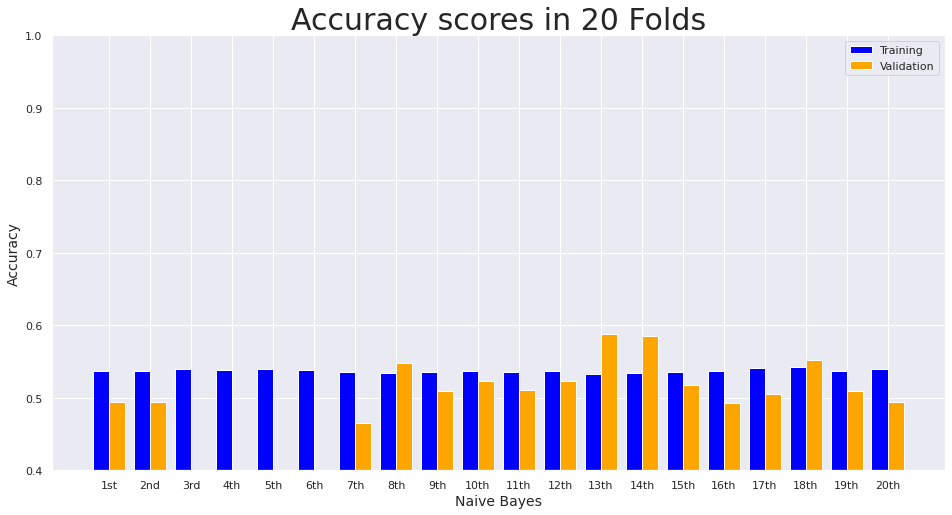

In [297]:
model = "Naive Bayes"
plot_result(model,
            "Accuracy",
            "Accuracy scores in 20 Folds",
            nbc_result["Training Accuracy scores"],
            nbc_result["Validation Accuracy scores"])

#### Random Forest

In [341]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc_result = cross_validation(rfc, x_sm, y_sm, 10)
print(rfc_result)

{'Training Accuracy scores': array([0.87238655, 0.87965877, 0.87315572, 0.84630445, 0.84273827,
       0.84413677, 0.84651423, 0.84490595, 0.8436473 , 0.84672401]), 'Mean Training Accuracy': 85.40172015942942, 'Training Precision scores': array([0.87517611, 0.88228668, 0.87920989, 0.8559724 , 0.84775823,
       0.8486609 , 0.85662876, 0.85158255, 0.8506994 , 0.85844419]), 'Mean Training Precision': 0.8606419109290202, 'Training Recall scores': array([0.86868969, 0.87624109, 0.86519368, 0.83275066, 0.83554748,
       0.83762238, 0.83230769, 0.83538462, 0.83356643, 0.83034965]), 'Mean Training Recall': 0.8447653367468778, 'Training F1 scores': array([0.87192084, 0.87925349, 0.87214548, 0.84420187, 0.84160856,
       0.84310551, 0.84429311, 0.84340582, 0.84204578, 0.84416323]), 'Mean Training F1 Score': 0.8526143684425224, 'Validation Accuracy scores': array([0.52989301, 0.46507237, 0.50660793, 0.7092511 , 0.74826935,
       0.72876023, 0.70862177, 0.72498427, 0.73882945, 0.71554437]), 'M

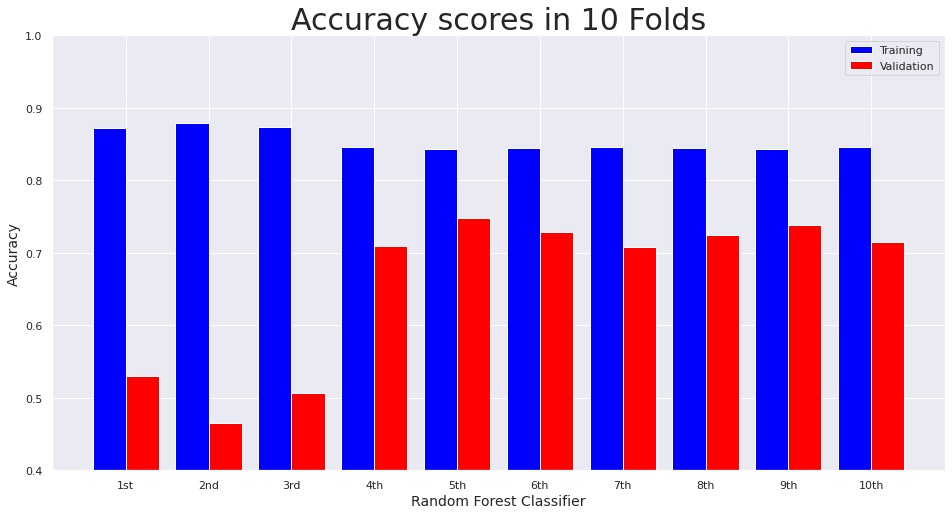

In [343]:
model = "Random Forest Classifier"
plot_result(model,
            "Accuracy",
            "Accuracy scores in 10 Folds",
            rfc_result["Training Accuracy scores"],
            rfc_result["Validation Accuracy scores"])

In [222]:
from sklearn import svm

In [231]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, x, y, cv=5)
scores

array([0.77177033, 0.77177033, 0.77129187, 0.77129187, 0.77166108])

# Salah

## Try Model again

#### CNN

In [224]:
from sklearn.model_selection import train_test_split

xd_train, xd_test, yd_train, yd_test = train_test_split(x,y,
                                                    test_size=0.3,
                                                    random_state=123)

In [225]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()

model.add(Dense(500, input_shape=(xd_train.shape[1], ), activation='relu')),
model.add(Dense(600, activation='relu')),
model.add(Dense(700, activation='relu')),
model.add(Dense(800, activation='relu')),
model.add(Dense(900, activation='relu')),
model.add(Dense(1000, activation='relu')),
model.add(Dense(1100, activation='relu')),
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [226]:
history_d=model.fit(xd_train, yd_train, validation_split=0.2, epochs=5)

Epoch 1/5
183/183 [==============================] - 12s 61ms/step - loss: 0.5482 - accuracy: 0.7732 - val_loss: 0.5692 - val_accuracy: 0.7614
Epoch 2/5
183/183 [==============================] - 13s 69ms/step - loss: 0.5369 - accuracy: 0.7732 - val_loss: 0.5539 - val_accuracy: 0.7614
Epoch 3/5
183/183 [==============================] - 11s 62ms/step - loss: 0.5378 - accuracy: 0.7732 - val_loss: 0.5529 - val_accuracy: 0.7614
Epoch 4/5
183/183 [==============================] - 11s 62ms/step - loss: 0.5365 - accuracy: 0.7732 - val_loss: 0.5495 - val_accuracy: 0.7614
Epoch 5/5
183/183 [==============================] - 12s 64ms/step - loss: 0.5372 - accuracy: 0.7732 - val_loss: 0.5501 - val_accuracy: 0.7614


#### Logistic Regression

In [227]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(xd_train,yd_train)

LogisticRegression()

In [228]:
training_prediction = log_reg.predict(xd_train)
training_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [229]:
test_prediction = log_reg.predict(xd_test)
test_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [230]:
#Performance in Data Training
from sklearn import metrics
print("Precision, Recall, Confusion matrix, in training\n")
print(metrics.classification_report(yd_train, training_prediction, digits=3))
print(metrics.confusion_matrix(yd_train, training_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

           0      0.771     1.000     0.871      5638
           1      0.000     0.000     0.000      1676

    accuracy                          0.771      7314
   macro avg      0.385     0.500     0.435      7314
weighted avg      0.594     0.771     0.671      7314

[[5638    0]
 [1676    0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [187]:
#Performance in Data Testing
from sklearn import metrics
print("Precision, Recall, Confusion matrix, in training\n")
print(metrics.classification_report(yd_test, test_prediction, digits=3))
print(metrics.confusion_matrix(yd_test, test_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

           0      0.775     1.000     0.873      1989
           1      0.000     0.000     0.000       577

    accuracy                          0.775      2566
   macro avg      0.388     0.500     0.437      2566
weighted avg      0.601     0.775     0.677      2566

[[1989    0]
 [ 577    0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Random Forest

In [232]:
from sklearn.ensemble import RandomForestClassifier

In [233]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(xd_train, yd_train)
y_pred = rfc.predict(xd_test)

In [234]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(yd_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.6651


### Handling Imbalance (Undersampling)

In [235]:
# Using Undersampling
class_0 = application_history_8[application_history_8['status']==0]
class_1 = application_history_8[application_history_8['status']==1]

print('class_0 :', class_0.shape)
print('class_1 :', class_1.shape)


class_0 : (6581, 14)
class_1 : (1971, 14)


In [236]:
#downsampling

class_0_downsampled=class_0.sample(1971)
print('Class 0 downsampled :', class_0_downsampled.shape)

Class 0 downsampled : (1971, 14)


In [237]:
application_history_downsampled=pd.concat([class_1, class_0_downsampled])
application_history_downsampled

,Pendapatan,FlagWorkPhone,FlagPhone,Email,JmlAnggotaKeluarga,Experience,status,JK_code,KepemilikanProperti_code,KepemilikanMobil_code,TipePendapatan_code,TingkatPendidikan_code,StatusKeluarga_code,TipeRumah_code
26,0.913580,0,1,0,0.333333,0.46875,1,0.0,1.0,1.0,0.0,0.0,1.0,1.0
29,0.358025,0,1,0,0.333333,0.06250,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0
79,0.790123,1,1,0,0.333333,0.31250,1,0.0,0.0,1.0,1.0,1.0,1.0,1.0
83,0.555556,0,0,0,0.333333,0.09375,1,0.0,0.0,1.0,1.0,0.0,1.0,2.0
118,0.111111,1,1,0,0.333333,0.46875,1,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28720,0.358025,0,0,0,0.333333,0.18750,0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
17964,0.259259,0,0,0,0.333333,0.03125,0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
14186,0.666667,0,0,0,0.000000,0.18750,0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
765,0.296296,0,0,0,0.666667,0.00000,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0


In [238]:
from sklearn.model_selection import train_test_split

x_b=application_history_downsampled.drop('status', axis=1)
y_b=application_history_downsampled['status']

xb_train, xb_test, yb_train, yb_test = train_test_split(x_b,y_b,
                                                    test_size=0.3,
                                                    random_state=100)

In [239]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()

model.add(Dense(500, input_shape=(xb_train.shape[1], ), activation='relu')),
model.add(Dense(600, activation='relu')),
model.add(Dense(700, activation='relu')),
model.add(Dense(800, activation='relu')),
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [240]:
history_b=model.fit(xb_train, yb_train, validation_split=0.2, epochs=5)

Epoch 1/5
69/69 [==============================] - 3s 23ms/step - loss: 0.6987 - accuracy: 0.4934 - val_loss: 0.6956 - val_accuracy: 0.4928
Epoch 2/5
69/69 [==============================] - 2s 22ms/step - loss: 0.6938 - accuracy: 0.5075 - val_loss: 0.7010 - val_accuracy: 0.4909
Epoch 3/5
69/69 [==============================] - 2s 25ms/step - loss: 0.6941 - accuracy: 0.4989 - val_loss: 0.6935 - val_accuracy: 0.4928
Epoch 4/5
69/69 [==============================] - 2s 24ms/step - loss: 0.6931 - accuracy: 0.5034 - val_loss: 0.6929 - val_accuracy: 0.5272
Epoch 5/5
69/69 [==============================] - 2s 23ms/step - loss: 0.6900 - accuracy: 0.5224 - val_loss: 0.7007 - val_accuracy: 0.5091


## Logistic Regression

### Undersampling

In [241]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(xb_train,yb_train)

LogisticRegression()

In [242]:
training_prediction = log_reg.predict(xb_train)
training_prediction

array([1, 0, 0, ..., 1, 0, 1])

In [243]:
test_prediction = log_reg.predict(xb_test)
test_prediction

array([0, 0, 1, ..., 0, 0, 1])

In [244]:
#Performance in Data Training
from sklearn import metrics
print("Precision, Recall, Confusion matrix, in training\n")
print(metrics.classification_report(yb_train, training_prediction, digits=3))
print(metrics.confusion_matrix(yb_train, training_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

           0      0.534     0.599     0.564      1393
           1      0.533     0.466     0.497      1366

    accuracy                          0.533      2759
   macro avg      0.533     0.533     0.531      2759
weighted avg      0.533     0.533     0.531      2759

[[834 559]
 [729 637]]


In [245]:
#Performance in Data Testing
print("Precision, Recall, Confusion matrix, in testing\n")
print(metrics.classification_report(yb_test, test_prediction, digits=3))
print(metrics.confusion_matrix(yb_test, test_prediction))

Precision, Recall, Confusion matrix, in testing

              precision    recall  f1-score   support

           0      0.487     0.559     0.521       578
           1      0.510     0.438     0.471       605

    accuracy                          0.497      1183
   macro avg      0.498     0.498     0.496      1183
weighted avg      0.499     0.497     0.495      1183

[[323 255]
 [340 265]]


## Model with Imbalance Data

### Logistic Regression

In [246]:
from sklearn.model_selection import train_test_split

xe_train, xe_test, ye_train, ye_test = train_test_split(x,y,
                                                    test_size=0.3,
                                                    random_state=100)

In [247]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(xe_train,ye_train)

LogisticRegression()

In [248]:
training_prediction = log_reg.predict(xe_train)
training_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [249]:
test_prediction = log_reg.predict(xe_test)
test_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [250]:
#Performance in Data Training
from sklearn import metrics
print("Precision, Recall, Confusion matrix, in training\n")
print(metrics.classification_report(ye_train, training_prediction, digits=3))
print(metrics.confusion_matrix(ye_train, training_prediction))

Precision, Recall, Confusion matrix, in training

              precision    recall  f1-score   support

           0      0.771     1.000     0.871      5637
           1      0.000     0.000     0.000      1677

    accuracy                          0.771      7314
   macro avg      0.385     0.500     0.435      7314
weighted avg      0.594     0.771     0.671      7314

[[5637    0]
 [1677    0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [251]:
#Performance in Data Testing
print("Precision, Recall, Confusion matrix, in testing\n")
print(metrics.classification_report(ye_test, test_prediction, digits=3))
print(metrics.confusion_matrix(ye_test, test_prediction))

Precision, Recall, Confusion matrix, in testing

              precision    recall  f1-score   support

           0      0.774     1.000     0.872      2425
           1      0.000     0.000     0.000       710

    accuracy                          0.774      3135
   macro avg      0.387     0.500     0.436      3135
weighted avg      0.598     0.774     0.675      3135

[[2425    0]
 [ 710    0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### CNN

In [130]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()

model.add(Dense(500, input_shape=(xe_train.shape[1], ), activation='relu')),
model.add(Dense(600, activation='relu')),
model.add(Dense(700, activation='relu')),
model.add(Dense(800, activation='relu')),
model.add(Dense(900, activation='relu')),
model.add(Dense(1000, activation='relu')),
model.add(Dense(1100, activation='relu')),
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [131]:
history_b=model.fit(xe_train, ye_train, validation_split=0.2, epochs=10)

Epoch 1/10
190/190 [==============================] - 13s 65ms/step - loss: 0.5626 - accuracy: 0.7599 - val_loss: 0.5184 - val_accuracy: 0.7929
Epoch 2/10
190/190 [==============================] - 12s 64ms/step - loss: 0.5500 - accuracy: 0.7632 - val_loss: 0.5141 - val_accuracy: 0.7929
Epoch 3/10
190/190 [==============================] - 12s 65ms/step - loss: 0.5486 - accuracy: 0.7632 - val_loss: 0.5122 - val_accuracy: 0.7929
Epoch 4/10
190/190 [==============================] - 12s 65ms/step - loss: 0.5498 - accuracy: 0.7632 - val_loss: 0.5141 - val_accuracy: 0.7929
Epoch 5/10
190/190 [==============================] - 12s 64ms/step - loss: 0.5487 - accuracy: 0.7632 - val_loss: 0.5149 - val_accuracy: 0.7929
Epoch 6/10
190/190 [==============================] - 12s 63ms/step - loss: 0.5489 - accuracy: 0.7632 - val_loss: 0.5123 - val_accuracy: 0.7929
Epoch 7/10
190/190 [==============================] - 12s 66ms/step - loss: 0.5484 - accuracy: 0.7632 - val_loss: 0.5159 - val_accuracy:

In [132]:
ye_pred=model.predict(xe_test)
ye_pred

102/102 [==============================] - 3s 18ms/step


array([[0.25555596],
       [0.2588114 ],
       [0.26202625],
       ...,
       [0.2609964 ],
       [0.2594972 ],
       [0.2563727 ]], dtype=float32)

In [133]:
ye_predict=[]

for element in ye_pred:
  if element >0.5:
    ye_predict.append(1)
  else:
    ye_predict.append(0)

In [134]:
from sklearn.metrics import classification_report
print(classification_report(ye_predict, ye_test))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87      3247
           1       0.00      0.00      0.00         0

    accuracy                           0.77      3247
   macro avg       0.50      0.39      0.44      3247
weighted avg       1.00      0.77      0.87      3247



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
